## Importing The Necessary Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

##### - Handling missing values

In [3]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
# dropping missing values from the dataset
df = df.dropna()

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**

     - **4 -** Makes And Models:

-  **Note:** 
   -  *In 2024, 7072 EVs ara registered which suggests that the dataset for 2024 is incomplete.* 

In [5]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

-   Now let's figure out the most most popular manufacturer and model

In [17]:
# Counting the top 10 most popular manufacturers in the dataset
df_makes = df.groupby('Make').size().reset_index(name='Count').sort_values(ascending=False, by='Count').head(10)
#df_makes

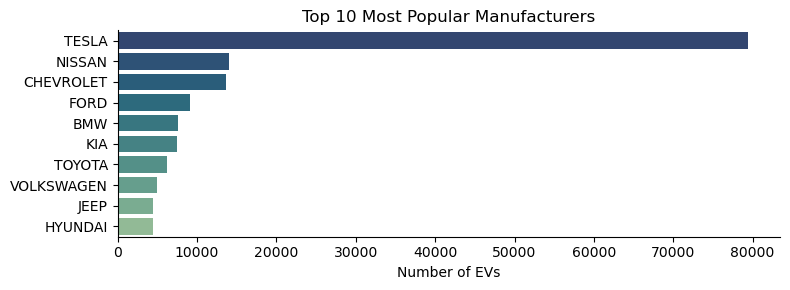

In [25]:
plt.figure(figsize=(8, 3))

# Plotting the top 10 most popular manufacturers
sns.barplot(data=df_makes, x='Count', y='Make', palette='crest_r')

sns.despine()
plt.title('Top 10 Most Popular Manufacturers')
plt.xlabel('Number of EVs')
plt.ylabel('')
plt.tight_layout()
plt.show()

-   #### Insights:
    -   **Tesla** leads the market with the highest number of EVs, indicating strong brand loyalty and innovation.

    -   **Nissan and Chevrolet** follow, benefiting from competitive pricing and diverse EV models.

    -   **Ford and BMW**show solid market shares, combining traditional brand loyalty with new EV offerings.

    -   *Kia*, *Toyota*, *Volkswagen*, *Jeep*, and *Hyundai* also feature in the top 10, showing a competitive and evolving market landscape.

  

-   Now let's find the most popular *Models* by the top *Manufaturers*

In [52]:
# Creating DataFrame for only top 10 manufaturers 
df_top10_makes = df[df['Make'].isin(df_makes['Make'])]
#df_top10_makes.head()

In [59]:
df_plot = df_top10_makes.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values(ascending=False, by='Count').head(10)

df_plot

,Make,Model,Count
52,TESLA,MODEL Y,35921
49,TESLA,MODEL 3,30009
48,NISSAN,LEAF,13352
50,TESLA,MODEL S,7711
16,CHEVROLET,BOLT EV,6811
51,TESLA,MODEL X,5784
20,CHEVROLET,VOLT,4782
61,VOLKSWAGEN,ID.4,3928
38,JEEP,WRANGLER,3382
26,FORD,MUSTANG MACH-E,3316


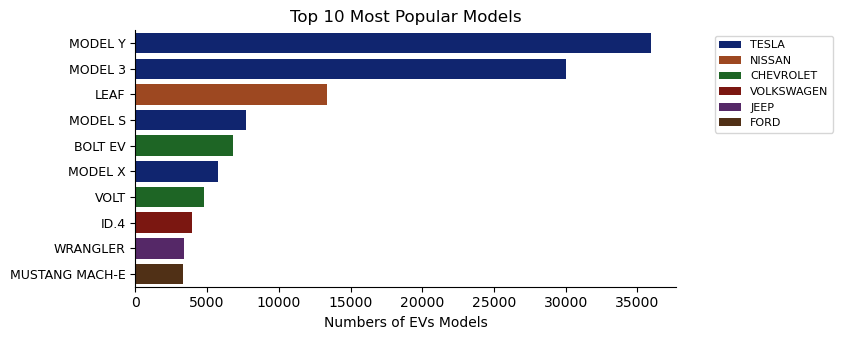

In [96]:
# Plot the top 10 most popular models
plt.figure(figsize=(9, 3.5))

sns.barplot(data=df_plot, x='Count', y='Model', hue='Make', palette='dark')

sns.despine()
plt.title('Top 10 Most Popular Models')
plt.xlabel('Numbers of EVs Models')
plt.ylabel('')
plt.yticks(fontsize=9)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1) ,fontsize=8)

plt.tight_layout()
plt.show()

-   #### Insights:
    -   **Tesla** models are the most popular, with four models in the top 10. Model Y and Model 3 lead the list, showing Tesla's strong market presence and

    -   **Nissan's LEAF** and **Chevrolet's Bolt** EV and Volt are also prominent, indicating these brands have substantial market share in the EV segment.

    -   The presence of *Volkswagen (ID.4)*, *Jeep (Wrangler)*, and *Ford (Mustang Mach-E)* shows a diverse mix of manufacturers contributing to the EV market.

-   The high number of registrations for *Tesla models* suggests a strong preference for their vehicles, likely due to their performance, range, and brand reputation.